In [1]:
import numpy
import pandas
import sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import BallTree, KDTree
from sklearn.utils import shuffle
from metric_learn import LMNN
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

In [2]:
header = ["class","alcohol", "malic_acid", "ash", "alcalinity of ash", "magnesium", "total phenols",
          "flavanoids", "nonflavanoid phenols", "proantholacyanis", "color intensity", "hue", "OD289/OD315", "proline"]

wine_dataset = pandas.read_csv("data/wine.csv", names=header)
wine_dataset = pandas.DataFrame(wine_dataset, columns=['class', 'alcohol', 'total phenols'])
wine_dataset
wine_dataset = shuffle(wine_dataset)
#print (wine_dataset)
train_to_test_ratio = 0.7
idx_of_split = int(0.7*len(wine_dataset))
plt.show()
train_dataset = wine_dataset[:idx_of_split]
test_dataset = wine_dataset[idx_of_split:]

print(len(train_dataset))
Y_train = pandas.DataFrame(train_dataset, columns=['class'])
X_train = train_dataset.drop('class', axis=1)
Y_test = pandas.DataFrame(test_dataset, columns=['class'])
X_test = test_dataset.drop('class', axis=1)

124


In [3]:
X_train = X_train.as_matrix()
Y_train = Y_train.as_matrix()
Y_test = Y_test.as_matrix()
X_test = X_test.as_matrix()

In [17]:
#lmnn = LMNN(k=1, learn_rate=1e-6)
#lmnn.fit(X_train, Y_train)
#params = lmnn.metric()
knn = KNeighborsClassifier(n_neighbors=1)
#knn = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis', metric_params={"V": numpy.cov(X_train.T)})
#knn = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis', metric_params={"V": params})
knn.fit(X_train, Y_train)
Y_predicted = knn.predict(X_test)
print(sklearn.metrics.accuracy_score(Y_test, Y_predicted))
print(sklearn.metrics.classification_report(Y_test, Y_predicted))

0.814814814815
             precision    recall  f1-score   support

          1       0.90      0.86      0.88        21
          2       0.84      0.80      0.82        20
          3       0.67      0.77      0.71        13

avg / total       0.82      0.81      0.82        54



/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [15]:

def map_color(x):
    if x==1:
        return '#FFAAAA'
    if x==2:
        return '#AAFFAA'
    return '#AAAAFF'

def map_color_bold(x):
    if x==1:
        return '#FF0000'
    if x==2:
        return '#00FF00'
    return '#0000FF'

def map_edge_colors(x):
    if x==1:
        return '#D01B1B'
    if x==2:
        return '#51D01B'
    return '#1B93D0'

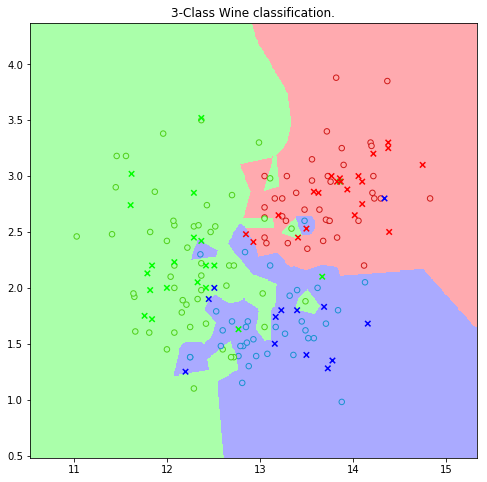

In [18]:
first_feature = X_train[:, 0]
x_min, x_max = first_feature.min(), first_feature.max()

second_feature = X_train[:, 1]
y_min, y_max = second_feature.min(), second_feature.max()

cmap_light = ListedColormap(['#FFAAAF', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = 0.01
xx, yy = numpy.meshgrid(
    numpy.arange(x_min-0.5, x_max+0.5, h), 
    numpy.arange(y_min-0.5, y_max+0.5, h))
Z = knn.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

col = numpy.apply_along_axis(map_color, 1, Y_train)
col_test = numpy.apply_along_axis(map_color_bold, 1, Y_test)
edge_colors = numpy.apply_along_axis(map_edge_colors, 1, Y_train)
Y_train[:,:1]

plt.scatter(first_feature, second_feature, c=col, marker='o', s=30, alpha=1,
            edgecolors=edge_colors, linewidths=1) # plot train data
plt.scatter(X_test[:, 0], X_test[:, 1], c=col_test, marker='x', s=30, edgecolors='black') # plot test data

plt.title("3-Class Wine classification.")

plt.show()